Methods to generate plots for static accuracy / reapplication experiments

The following block of code creates an object g that reads four sets of CSV files (with reapplication), constructs a pandas DataFrame, and fits a first-order polynomial model using 80% of the data for training and 20% for testing (as defined in the train_test class method). This data split is performed randomly. After fitting the model, the code plots the model's accuracy over 100 iterations.

Subsequently, the fitted model is used to assess the accuracy of two additional sets of tests, where reapplication occurred before each block of tests. 

In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Reapplication datasets

Start by plotting curves / accuracy for all datasets individually 

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized (R-R0) / R0. ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized (R-R0) / R0. ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/third test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_3.csv']
ADC normalized (R-R0) / R0. ADC min:  -160.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/fourth test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_4.csv']
ADC normalized (R-R0) / R0. ADC min:  -150.0


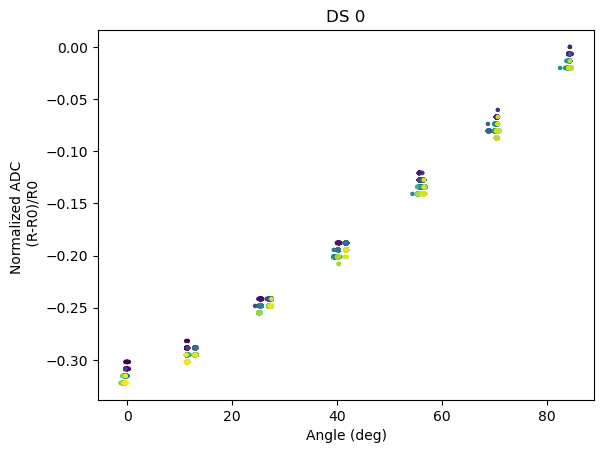

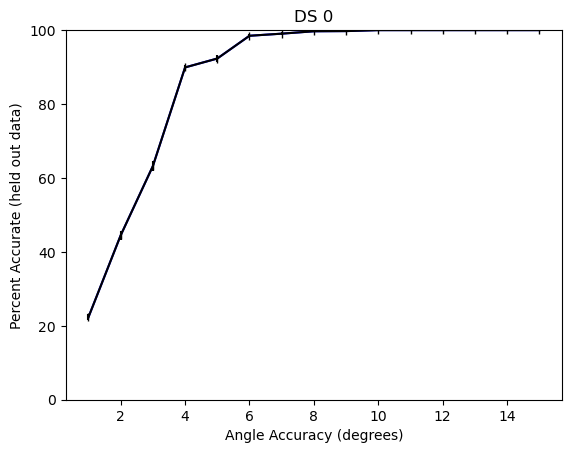

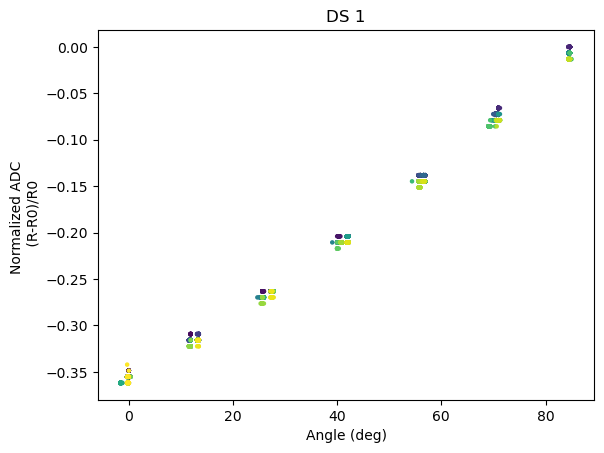

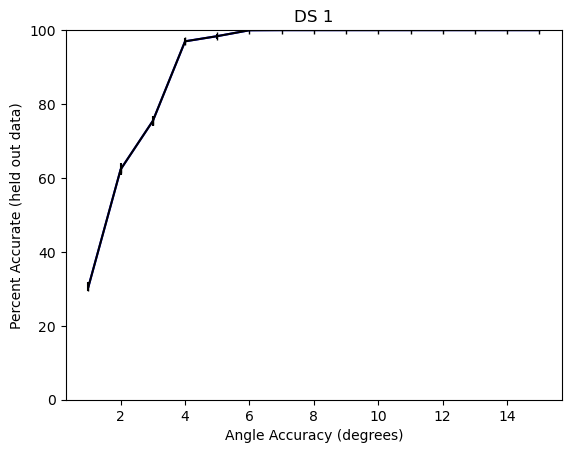

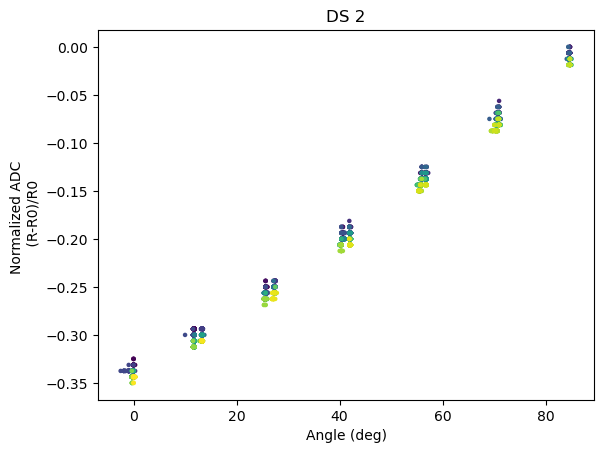

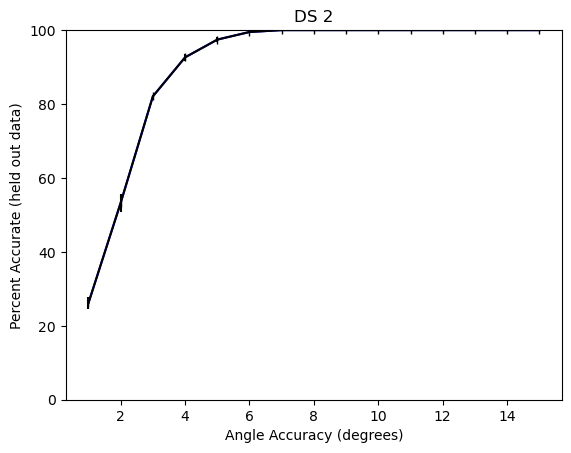

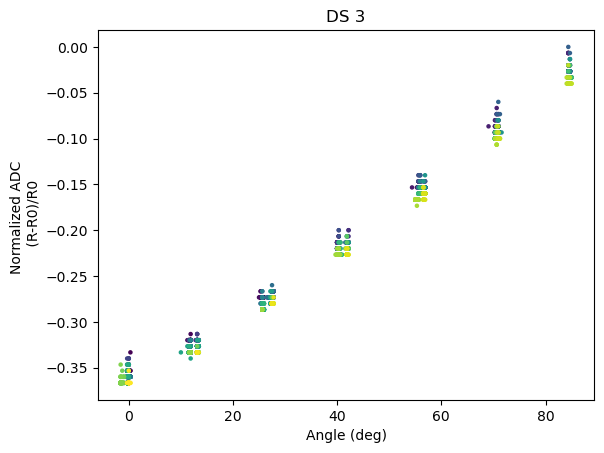

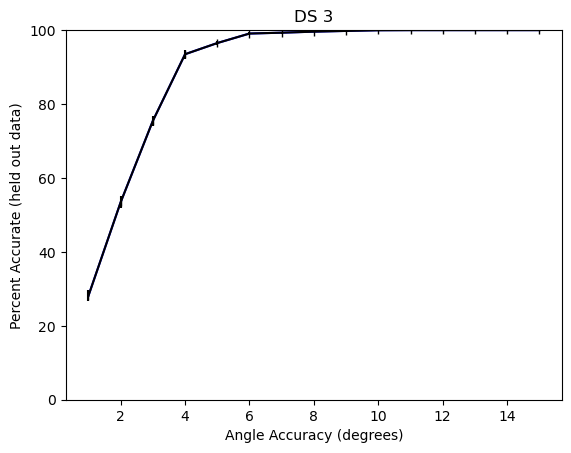

In [2]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/first test/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/third test/*.csv")
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/fourth test/*.csv")

DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

Using normalize_adc_bw_01():: Now fit model on dataset 1 and test on dataset 2 and 3 etc. 

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/third test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_3.csv']
ADC normalized bw 0-1. ADC max:  -104.0 ADC min:  -160.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/third test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_3.csv']
ADC normalized bw 0-1. ADC max:  -104.0 ADC min:  -160.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV

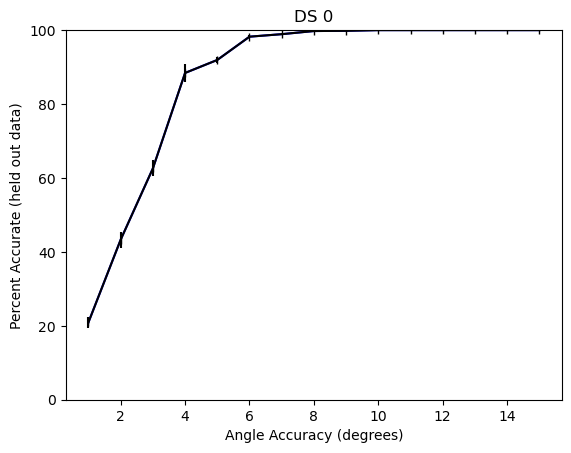

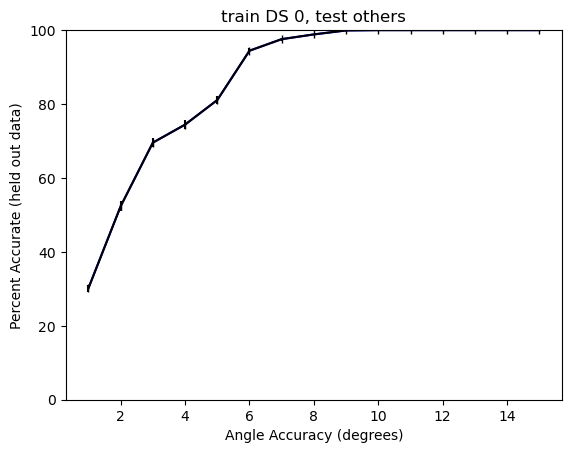

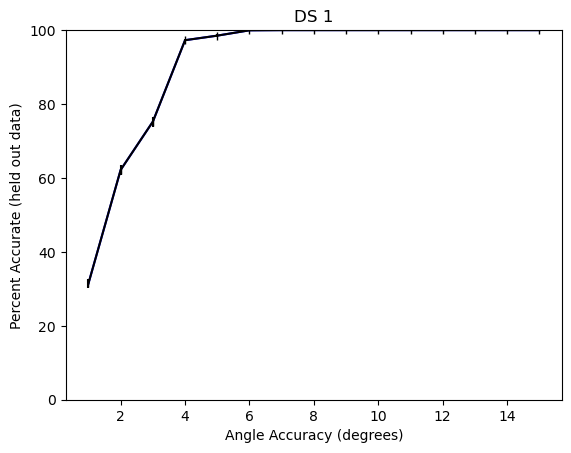

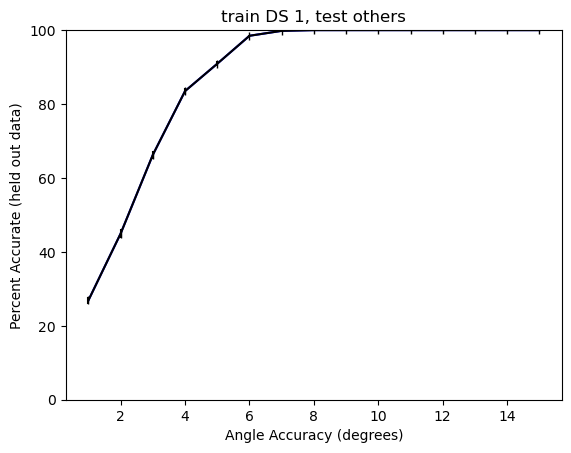

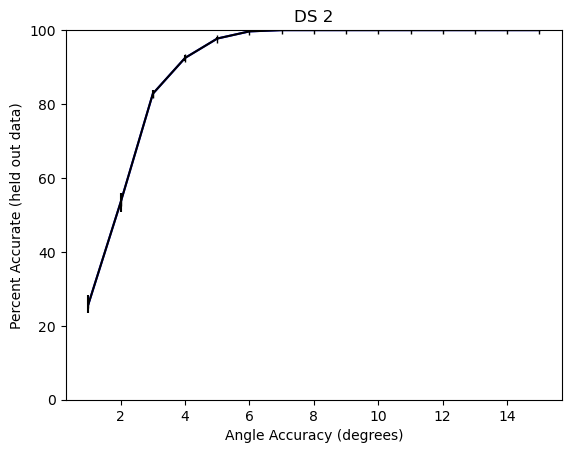

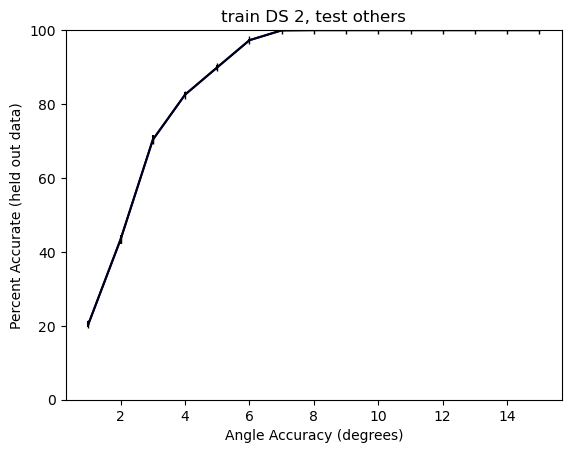

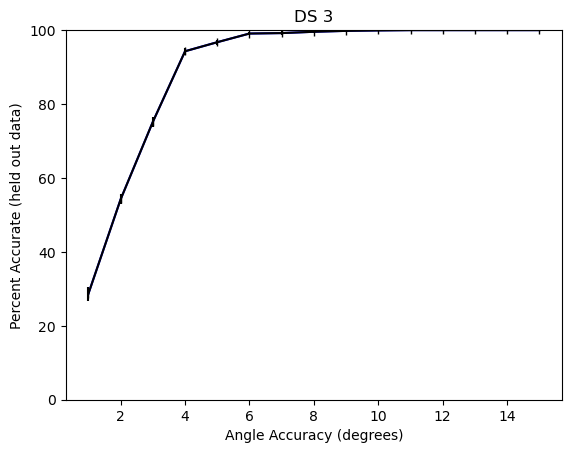

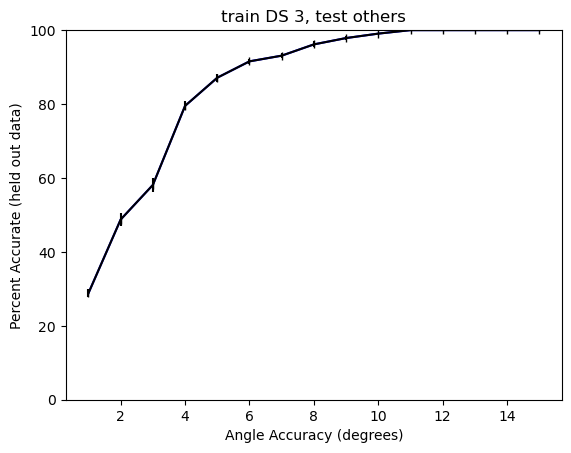

In [3]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1, 2, 3]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_bw_01()
    g4 = bender_class()
    g4.load_data(DS_all[ixs[2]])
    g4.normalize_adc_bw_01()

    df_combined = pd.concat([g2.data, g3.data, g4.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)

